# Face Detection

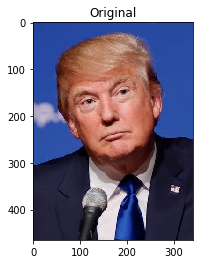

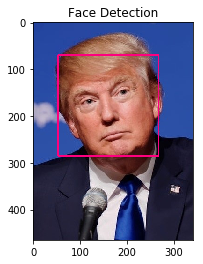

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

face_classifier = cv2.CascadeClassifier('../Data/Haarcascades/haarcascade_frontalface_default.xml')

image = cv2.imread('../Data/Images/Trump.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2.imshow('Original', image)
cv2.waitKey()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.show()

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

if faces is ():
    print("No faces found")

for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)
    cv2.imshow('Face Detection', image)
    cv2.waitKey(0)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Face Detection')
    plt.show()
    
cv2.destroyAllWindows()

# Face with Eye Detection

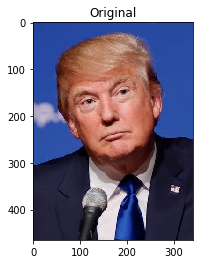

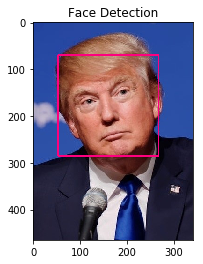

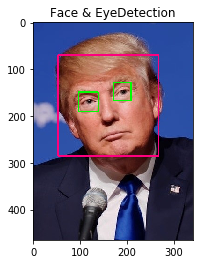

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

face_classifier = cv2.CascadeClassifier('../Data/Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('../Data/Haarcascades/haarcascade_eye.xml')

image = cv2.imread('../Data/Images/Trump.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2.imshow('Original', image)
cv2.waitKey()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.show()

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

if faces is ():
    print("No faces found")

for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)
    cv2.imshow('Face Detection', image)
    cv2.waitKey(0)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Face Detection')
    plt.show()
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray, 1.2, 5)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    cv2.imshow('Face & Eye Detection',image)
    cv2.waitKey(0)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Face & EyeDetection')
    plt.show()
    
cv2.destroyAllWindows()

# Real time Face & Eye Detection

In [1]:
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier('../Data/Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('../Data/Haarcascades/haarcascade_eye.xml')

def face_detector(img, size=0.5):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return img
    
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
        eyes = eye_classifier.detectMultiScale(img)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),(0,255,0),2) 
    return img

cap = cv2.VideoCapture(1)
# time.sleep(2)

while True:

    ret, frame = cap.read()
    cv2.imshow('Our Face Extractor', face_detector(frame))
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()      

error: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\imgproc\src\color.cpp:11147: error: (-215) scn == 3 || scn == 4 in function cv::cvtColor


# Car Detection

In [3]:
import cv2
import time
import numpy as np

car_classifier = cv2.CascadeClassifier('../Data/Haarcascades/haarcascade_car.xml')

cap = cv2.VideoCapture('../Data/Images/cars.avi')

while cap.isOpened():
    
    time.sleep(.05)
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
   
    cars = car_classifier.detectMultiScale(gray, 1.4, 2)

    for (x,y,w,h) in cars:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.imshow('Cars', frame)

    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break

cap.release()
cv2.destroyAllWindows()

# Pedestrian Detection

In [4]:
import cv2
import numpy as np

body_classifier = cv2.CascadeClassifier('../Data/Haarcascades/haarcascade_fullbody.xml')

cap = cv2.VideoCapture('../Data/Images/walking.avi')

while cap.isOpened():
    ret, frame = cap.read()
#     frame = cv2.resize(frame, None,fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    bodies = body_classifier.detectMultiScale(gray, 1.2, 3)
    
    for (x,y,w,h) in bodies:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.imshow('Pedestrians', frame)

    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break

cap.release()
cv2.destroyAllWindows()